In [1]:
! pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import seaborn as sns
import matplotlib.ticker as ticker

air_data_path = "airquality.csv"
air_data = pd.read_csv(air_data_path)
air_data.head()

,Unnamed: 0,Unnamed: 1,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,NaN,NaN,mean,mean,mean,mean
1,State,Year,NaN,NaN,NaN,NaN
2,Alabama,2013,12.065634967741929,0.012098838709677423,0.750311306451613,0.2110068870967743
3,Alabama,2014,9.411745809286877,0.02466014925373136,1.1865171293532364,0.20592147014925288
4,Alabama,2015,9.07858020666667,0.023999966666666726,1.0094290199999982,0.2210266799999999


In [38]:
air_data = air_data.rename(columns = {"Unnamed: 0":"State", "Unnamed: 1": "Year"})
air_data.head()

,State,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,NaN,NaN,mean,mean,mean,mean
1,State,Year,NaN,NaN,NaN,NaN
2,Alabama,2013,12.065634967741929,0.012098838709677423,0.750311306451613,0.2110068870967743
3,Alabama,2014,9.411745809286877,0.02466014925373136,1.1865171293532364,0.20592147014925288
4,Alabama,2015,9.07858020666667,0.023999966666666726,1.0094290199999982,0.2210266799999999


In [39]:
air_data = air_data.drop(air_data.index[[0,1]])
air_data.head()

,State,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
2,Alabama,2013,12.065634967741929,0.012098838709677423,0.750311306451613,0.2110068870967743
3,Alabama,2014,9.411745809286877,0.02466014925373136,1.1865171293532364,0.20592147014925288
4,Alabama,2015,9.07858020666667,0.023999966666666726,1.0094290199999982,0.2210266799999999
5,Alabama,2016,9.524873194630876,0.02834774496644293,0.8351175503355704,0.20951413758389284
6,Alaska,2014,11.658509608938544,0.010306575418994405,5.951531268156425,0.4554438687150833


In [4]:
air_data.to_csv("cleaned_air.csv")

In [40]:
#air_data = air_data.set_index("State")
air_data.head()

,State,Year,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
2,Alabama,2013,12.065634967741929,0.012098838709677423,0.750311306451613,0.2110068870967743
3,Alabama,2014,9.411745809286877,0.02466014925373136,1.1865171293532364,0.20592147014925288
4,Alabama,2015,9.07858020666667,0.023999966666666726,1.0094290199999982,0.2210266799999999
5,Alabama,2016,9.524873194630876,0.02834774496644293,0.8351175503355704,0.20951413758389284
6,Alaska,2014,11.658509608938544,0.010306575418994405,5.951531268156425,0.4554438687150833


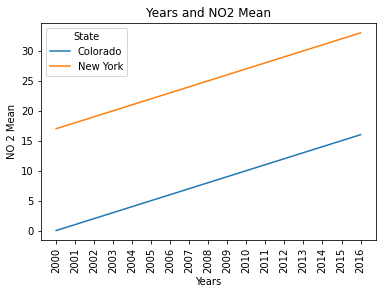

In [54]:
example_df = air_data.loc[((air_data["State"] == "New York")) | ((air_data["State"]=="Colorado"))]
example_df_2 = example_df[["Year", "NO2 Mean", "O3 Mean"]]
example_df_2=example_df_2.astype(float)
example_df_2["State"] = example_df["State"]
example_df_2.dtypes

ax = sns.lineplot(data=example_df, x="Year", y="NO2 Mean", hue="State")
plt.xlabel("Years")
plt.ylabel("NO 2 Mean")
plt.title("Years and NO2 Mean")
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().invert_yaxis()
plt.xticks(rotation = 'vertical')
plt.show()




In [91]:
#Need to convery O3 and CO from ppm to ppb
pollution_index = air_data[["NO2 Mean", 'O3 Mean', 'SO2 Mean', 'CO Mean']]
#example_df_2=example_df_2.astype(float)
pollution_index = pollution_index.astype(float)
pollution_index["O3 Mean"] *=1000
pollution_index["CO Mean"] *=1000

pollution_index.loc[:,'Pollution Index'] = pollution_index.sum(axis=1)

pollution_index["State"] = air_data["State"]
pollution_index["Year"] = air_data["Year"]

new_df = pollution_index[["State", "Year","NO2 Mean", 'O3 Mean', 'SO2 Mean', 'CO Mean', "Pollution Index" ]]
new_df.head()

new_df.to_csv("pollution_index.csv")

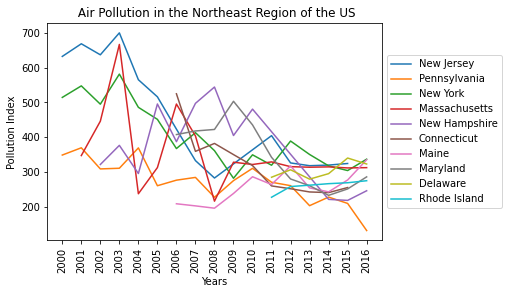

In [104]:
#Northeast
north_east = new_df.loc[((new_df["State"] == "Maine")) | ((new_df["State"]=="Massachusetts")) |
                       ((new_df["State"] == "Rhode Island"))| ((new_df["State"] == "Connecticut"))|
                       ((new_df["State"] == "New Hampshire")) | ((new_df["State"] == "Vermont"))|
                       ((new_df["State"] == "New York"))|((new_df["State"] == "Pennsylvania"))|
                       ((new_df["State"] == "New Jersey"))|((new_df["State"] == "Delaware"))|
                       ((new_df["State"] == "Maryland"))] 

north_east = north_east.sort_values("Year").reset_index(drop=True)
ne = sns.lineplot(data=north_east, x="Year", y="Pollution Index", hue="State")
plt.xlabel("Years")
plt.ylabel("Pollution Index")
plt.title(" Air Pollution in the Northeast Region of the US")
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation = 'vertical')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

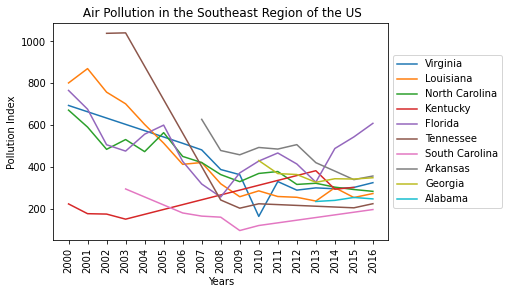

In [106]:
#Southeast
south_east = new_df.loc[((new_df["State"] == "West Virginia")) | ((new_df["State"]=="Virginia")) |
                       ((new_df["State"] == "Kentucky"))| ((new_df["State"] == "Tennessee"))|
                       ((new_df["State"] == "North Carolina")) | ((new_df["State"] == "South Carolina"))|
                       ((new_df["State"] == "Georgia"))|((new_df["State"] == "Alabama"))|
                       ((new_df["State"] == "Mississippi"))|((new_df["State"] == "Arkansas"))|
                       ((new_df["State"] == "Louisiana")) |((new_df["State"] == "Florida")) ] 


south_east = south_east.sort_values("Year").reset_index(drop=True)
se = sns.lineplot(data=south_east, x="Year", y="Pollution Index", hue="State")
plt.xlabel("Years")
plt.ylabel("Pollution Index")
plt.title(" Air Pollution in the Southeast Region of the US")
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation = 'vertical')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

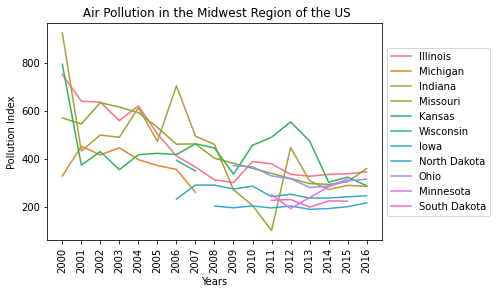

In [107]:
#Midwest
mid_west = new_df.loc[((new_df["State"] == "Ohio")) | ((new_df["State"]=="Indiana")) |
                       ((new_df["State"] == "Michigan"))| ((new_df["State"] == "Illinois"))|
                       ((new_df["State"] == "Missouri")) | ((new_df["State"] == "Wisconsin"))|
                       ((new_df["State"] == "Minnesota"))|((new_df["State"] == "Iowa"))|
                       ((new_df["State"] == "Kansas"))|((new_df["State"] == "Nebraska"))|
                       ((new_df["State"] == "South Dakota")) |((new_df["State"] == "North Dakota")) ] 


mid_west = mid_west.sort_values("Year").reset_index(drop=True)
mw = sns.lineplot(data=mid_west, x="Year", y="Pollution Index", hue="State")
plt.xlabel("Years")
plt.ylabel("Pollution Index")
plt.title(" Air Pollution in the Midwest Region of the US")
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation = 'vertical')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

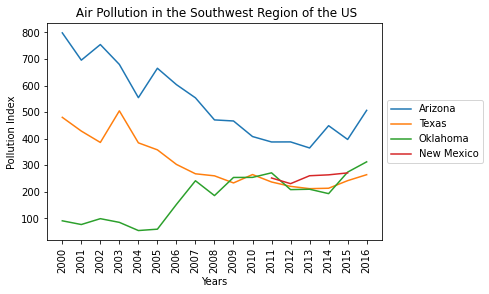

In [110]:
#Southwest
south_west = new_df.loc[((new_df["State"] == "Texas")) | ((new_df["State"]=="Oklahoma")) |
                       ((new_df["State"] == "New Mexico"))| ((new_df["State"] == "Arizona"))
                       ] 



south_west = south_west.sort_values("Year").reset_index(drop=True)
sw = sns.lineplot(data=south_west, x="Year", y="Pollution Index", hue="State")
plt.xlabel("Years")
plt.ylabel("Pollution Index")
plt.title(" Air Pollution in the Southwest Region of the US")
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation = 'vertical')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

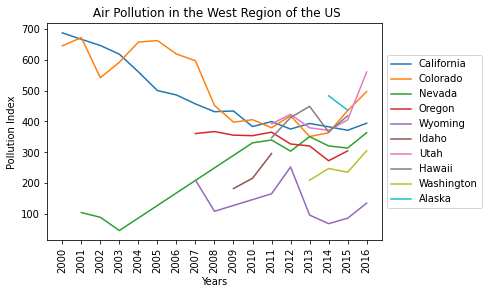

In [112]:
#West
west = new_df.loc[((new_df["State"] == "Colorado")) | ((new_df["State"]=="Wyoming")) |
                       ((new_df["State"] == "Montana"))| ((new_df["State"] == "Idaho"))|
                       ((new_df["State"] == "Washington")) | ((new_df["State"] == "Oregon"))|
                       ((new_df["State"] == "Utah"))|((new_df["State"] == "Nevada"))|
                       ((new_df["State"] == "California"))|((new_df["State"] == "Alaska"))|
                       ((new_df["State"] == "Hawaii"))] 


west = west.sort_values("Year").reset_index(drop=True)
w = sns.lineplot(data=west, x="Year", y="Pollution Index", hue="State")
plt.xlabel("Years")
plt.ylabel("Pollution Index")
plt.title(" Air Pollution in the West Region of the US")
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation = 'vertical')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()